In [9]:
#install.packages("hash")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
library(igraph)
library(hash)

hash-2.2.6 provided by Decision Patterns



In [29]:
library(data.table)
library(ggplot2)

In [3]:
g <- read.graph("data/edge_weight2.txt", format="ncol", directed=FALSE)

In [17]:
save(g,file="data/movie_network")

In [4]:
fg = cluster_fast_greedy(g)

In [18]:
save(fg,file="data/community")

In [6]:
length(fg)

[1] 24

In [26]:
ratings = read.table("data/movie_rating_utf-8.txt",sep="\t")

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 311 did not have 3 elements


ERROR: Error in as.igraph.vs(graph, nodes): Invalid vertex names


In [ ]:
nodes<-c("84869","86485","191381")
final_list<-list()
j<-1
for(nn in 1:3){
    nl<-neighbors(g,nodes[[nn]])
    communityno<-membership(fg1)[[nodes[[nn]]]]
    carr<-fg1[[communityno]]
    
    ratings_list<-list()
    
    i<-1
    ll<-c()
    for (v in nl){
        ll[[i]]<-vertex_attr(g,index=v)$name
        i<-i+1
    }
    i<-1
    common<-intersect(ll,carr)
    for(n in common){
        #if(i>10)
        #  break
        nm<-vertex_attr(g, index =n)$name
        moviename<-moviemap[[nm]]
        r<-subset(ratings,V1==moviename)$V2
        ratings_list[[i]]<-r
        i<-i+1
    }
    final_list[[j]]<-ratings_list
    j<-j+1
}



In [13]:
idx_g = hash()
g_idx = hash()
f2 <- file("data/movie_idx_ori2gra.txt", "r")
line = readLines(f2, n = 1)
while (length(line) != 0) {
    arr = strsplit(line, "[ ]")
    .set(idx_g, arr[[1]][1], arr[[1]][2])
    .set(g_idx, arr[[1]][2], arr[[1]][1])
    line = readLines(f2, n = 1)
}

In [19]:
idx_to_mov = hash()
f1 <- file("data/index2movie.txt", "r")
lines = readLines(f1)
for (line in lines) {
    if (nchar(line) > 1) {
        arr = strsplit(line, "[ ]")
        .set(idx_to_mov, arr[[1]][1], substr(line, start = 11, stop = nchar(line)))
    }
}

In [99]:

mov_to_rating = hash()
f1 <- file("data/movie_rating_utf-8.txt", "r")
lines = readLines(f1)
for (line in lines) {
    
    if (nchar(line) > 1) {
        arr = strsplit(line, "[\t\t]")
        m = arr[[1]][1]
        m1 = strsplit(m, " \\((?=[^ \\(]+$)", perl=TRUE)
        
        .set(mov_to_rating, m1[[1]][1], arr[[1]][3])
    }
}

In [97]:
s1 = "Bamma Maata Bangaru Baata (1980) (1990)"
m1 = strsplit(s1, " \\((?=[^ \\(]+$)", perl=TRUE)
m1[[1]][1]

[1] "Bamma Maata Bangaru Baata (1980)"

In [127]:
mov_to_rating[["Mission: Impossible - Rogue Nation"]]

NULL

In [141]:
# Question 10
movies = c('Batman v Superman: Dawn of Justice (2016)', 'Mission: Impossible - Rogue Nation (2015)', 'Minions (2015)')
indices = c('10403', '38823', '76854')
rt <-list()
for (i in c(1:3)) {
    ratings = c()

    
    idx = indices[i]
    g_id = idx_g[[idx]]
    neigh = neighbors(g, as.numeric(g_id))
    print(paste('neighbors: ', length(neigh)))
    node_comm_id = -1
    #Getting community ID of the current movie
    for (comm_id in 1:length(fg)){
        if (idx %in% fg[[comm_id]]){
          node_comm_id = comm_id
          break
        }
    }
    
    for (n in neigh) {
        n_idx = g_idx[[as.character(n)]]
        n_com = -1
        for (comm_id in 1:length(fg)){
            if (n_idx %in% fg[[comm_id]]){
              n_com = comm_id
              break
            }
        }
        
        # we found a neighbor belonging to the same community as current movie
        if (n_com == node_comm_id) {
            movie = idx_to_mov[[as.character(g_idx[[as.character(n)]])]]
            rating = mov_to_rating[[movie]]
            
            if (!is.null(rating)) {
                ratings = c(ratings, as.numeric(rating))
                
            }
        }
    }
    
    rt[[i]] = ratings
    
    #hist(ratings,breaks=20, main='Histogram of')
    #print(paste('The average rating of the movies in the community neighborhood is',(sum(ratings)/length(ratings))))
}

[1] "neighbors:  1092"
[1] "neighbors:  843"
[1] "neighbors:  773"


[1] "The average rating of the movies in the community neighborhood is 6.3892095357591"


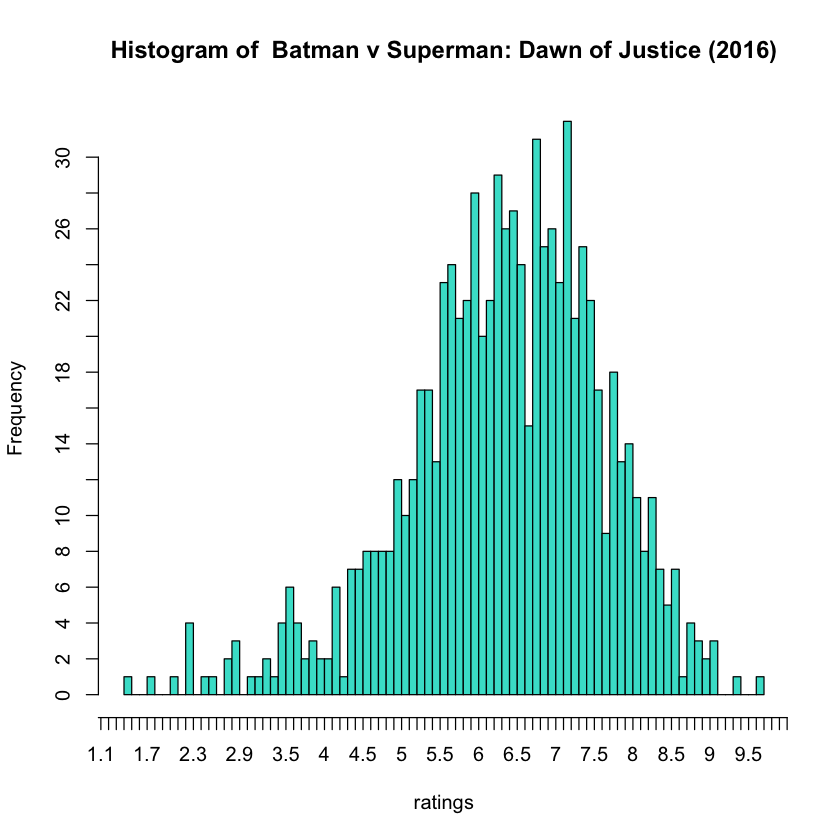

[1] "The average rating of the movies in the community neighborhood is 6.34263157894737"


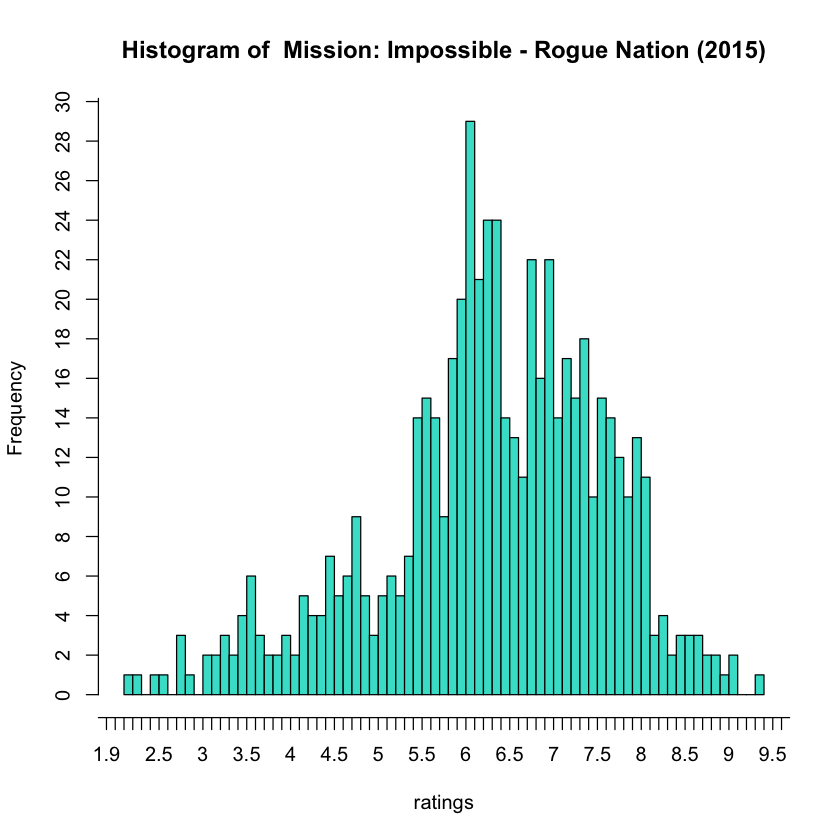

[1] "The average rating of the movies in the community neighborhood is 6.79485981308411"


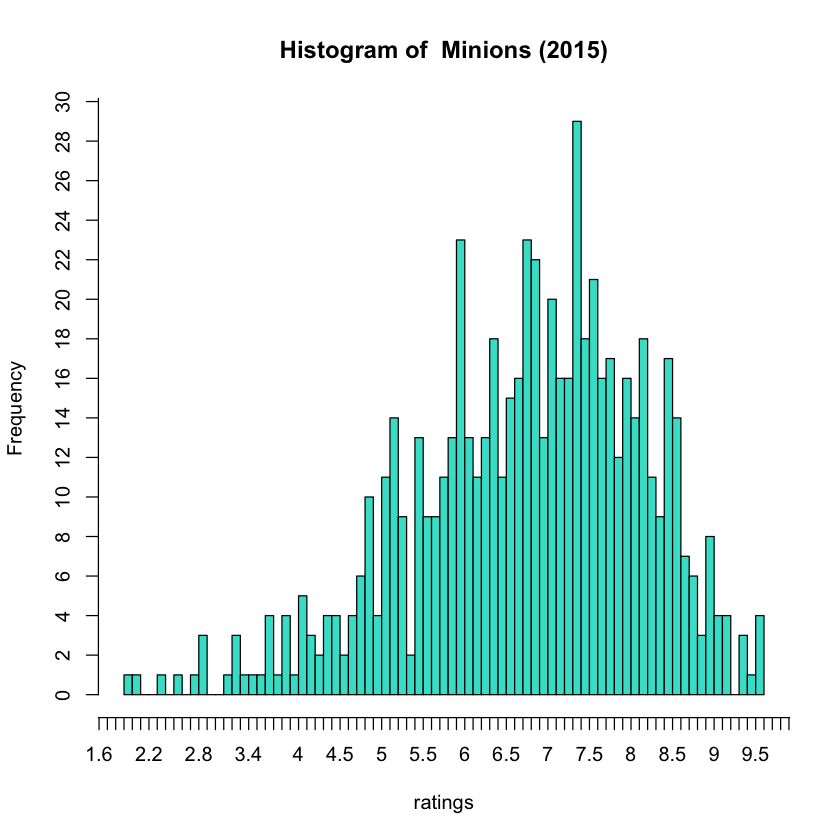

In [142]:

hist(rt[[1]],breaks=100, main=paste('Histogram of ',movies[1]),axes = FALSE,col = "turquoise",xlab="ratings")
axis(side=2,at=seq(0,30,by=2), labels = seq(0,30,by=2))
axis(side = 1, at=seq(0.0,10.0,by=0.1), labels = seq(0.0,10.0,by=0.1))
print(paste('The average rating of the movies in the community neighborhood is',(sum(rt[[1]])/length(rt[[1]]))))


hist(rt[[2]],breaks=100, main=paste('Histogram of ',movies[2]),axes = FALSE,col = "turquoise",xlab="ratings")
axis(side=2,at=seq(0,60,by=2), labels = seq(0,60,by=2))
axis(side = 1, at=seq(0.0,10.0,by=0.1), labels = seq(0.0,10.0,by=0.1))
print(paste('The average rating of the movies in the community neighborhood is',(sum(rt[[2]])/length(rt[[2]]))))



hist(rt[[3]],breaks=100, main=paste('Histogram of ',movies[3]),axes = FALSE,col = "turquoise",xlab="ratings")
axis(side=2,at=seq(0,60,by=2), labels = seq(0,60,by=2))
axis(side = 1, at=seq(0.0,10.0,by=0.1), labels = seq(0.0,10.0,by=0.1))
print(paste('The average rating of the movies in the community neighborhood is',(sum(rt[[3]])/length(rt[[3]]))))





In [128]:
# Question 11

In [129]:
edgelistFile<-"data/edge_weight2.txt"

In [130]:
alledges = fread(edgelistFile,header = FALSE, data.table = TRUE)
colnames(alledges) = c("n1", "n2", "weight")

Read 67132678 rows and 3 (of 3) columns from 1.950 GB file in 00:00:33


In [180]:
neighborhood = ego(g,order=1,nodes='10403')

for (neighbor in neighborhood[[1]]){
    print(neighbor)
    
}

[1] 21758
[1] 18
[1] 23
[1] 27
[1] 87
[1] 102
[1] 164
[1] 177
[1] 180
[1] 190
[1] 198
[1] 199
[1] 207
[1] 208
[1] 211
[1] 217
[1] 219
[1] 231
[1] 260
[1] 262
[1] 296
[1] 299
[1] 305
[1] 306
[1] 327
[1] 332
[1] 333
[1] 343
[1] 353
[1] 362
[1] 417
[1] 437
[1] 444
[1] 503
[1] 505
[1] 526
[1] 558
[1] 560
[1] 582
[1] 598
[1] 612
[1] 631
[1] 671
[1] 672
[1] 700
[1] 701
[1] 731
[1] 743
[1] 748
[1] 757
[1] 794
[1] 807
[1] 883
[1] 893
[1] 896
[1] 905
[1] 912
[1] 959
[1] 963
[1] 965
[1] 966
[1] 967
[1] 970
[1] 1008
[1] 1014
[1] 1021
[1] 1030
[1] 1047
[1] 1055
[1] 1087
[1] 1129
[1] 1139
[1] 1141
[1] 1154
[1] 1182
[1] 1187
[1] 1191
[1] 1235
[1] 1266
[1] 1299
[1] 1317
[1] 1344
[1] 1366
[1] 1431
[1] 1438
[1] 1448
[1] 1475
[1] 1505
[1] 1524
[1] 1528
[1] 1572
[1] 1673
[1] 1678
[1] 1694
[1] 1775
[1] 1787
[1] 1794
[1] 2213
[1] 2223
[1] 2232
[1] 2233
[1] 2240
[1] 2246
[1] 2267
[1] 2479
[1] 2529
[1] 2545
[1] 2568
[1] 2575
[1] 2578
[1] 2579
[1] 2584
[1] 2598
[1] 2611
[1] 2614
[1] 2638
[1] 2654
[1] 2680
[1]

In [172]:
idx_to_mov[[as.character(10403)]]

[1] "Batman v Superman: Dawn of Justice"

In [158]:
#nodes<-c("84869","86485","191381")
finalmem<-c()
topn<-c()
j<-1
for(nn in 1:3){
    e1<-alledges[which(alledges$"n1" == indices[[nn]]| alledges$"n2" == indices[[nn]]),]
    e2 =  e1[order(-e1$"weight"),]
    d<-data.frame(e2[1:5,])
    neigh<-c()
    cc<-c()
    for(i in 1:5){
        t<-d[i,which(d[i,1:2]!=indices[[nn]])]
        neigh[[i]]<-as.character(t)
        cc[[i]]<-membership(fg)[[as.character(t)]]
        
    }
    finalmem[[j]]<-cc
    topn[[j]]<-neigh
    j<-j+1
}

In [159]:
finalmem

[[1]]
[1] 1 1 1 1 1

[[2]]
[1] 14  1  1  1 14

[[3]]
[1] 1 1 1 1 1

In [160]:
topn

[[1]]
[1] "22104" "10445" "33021" "3403"  "9594" 

[[2]]
[1] "32497" "56713" "67271" "38824" "2161" 

[[3]]
[1] "37273" "60087" "37248" "51701" "84502"

In [161]:
for(i in 1:3){
    print("============")
    for(j in 1:5)
        print(idx_to_mov[[topn[[i]][[j]]]])
}

[1] "============"
[1] "Eloise"
[1] "The Justice League Part One"
[1] "Into the Storm"
[1] "Man of Steel"
[1] "Love and Honor"
[1] "============"
[1] "Fan"
[1] "Breaking the Bank"
[1] "Suffragette"
[1] "Now You See Me: The Second Act"
[1] "Phantom"
[1] "============"
[1] "The Lorax"
[1] "Surf's Up"
[1] "Despicable Me 2"
[1] "Up"
[1] "WALL·E"
